<a href="https://colab.research.google.com/github/MaliheDahmardeh/Olympic-History/blob/main/Olympic_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data info

**Context:**

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. data has scraped from www.sports-reference.com in May 2018. 

The Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on.

**Content:**

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

ID : Unique number for each athlete

Name : Athlete's name

Sex : M or F

Age : Integer

Height : In centimeters

Weight : In kilograms

Team : Team name

NOC : National Olympic Committee 3-letter code

Games : Year and season

Year : Integer

Season : Summer or Winter

City : Host city

Sport : Sport

Event : Event

Medal : Gold, Silver, Bronze, or NA

#Dataset loading

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [111]:
!ls

athlete_events.csv  noc_regions.csv  sample_data


In [112]:
df_events = pd.read_csv('athlete_events.csv')

In [113]:
df_noc = pd.read_csv('noc_regions.csv')

In [114]:
df = pd.merge(df_events,df_noc,on='NOC',how='left')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


#Data Cleaning

In [116]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [117]:
#drop columns 'notes' and 'ID' because they are not important and column 'notes' has lots of null values
df.drop(columns=['notes','ID'],inplace=True)

In [118]:
#check for regions missing data with respret to NOC and Team, we see which ones are missing  
df.loc[df['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [119]:
#view of "unknown" NOC
noc_unknown=df.loc[(df["NOC"]=="UNK")]
noc_unknown

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
61080,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN
130721,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN


In [120]:
#replace missing data in the regions columns
df['region'] = np.where(df['NOC']=='SGP', 'Singapore', df['region'])
df['region'] = np.where(df['NOC']=='TUV', 'Tuvalu', df['region'])
df['region'] = np.where(df['NOC']=='UNK', 'Unknown', df['region'])
df['region'] = np.where(df['NOC']=='ROT', 'Refugee Olympic Athletes', df['region'])

In [121]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region         0
dtype: int64

In [122]:
# check and drop duplicated rows
df.duplicated().sum()

1385

In [123]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Fill  null value for Age, Height and Weight with mean of them

In [124]:
#Mean of height
mean_height=df["Height"].mean()
rmh=round(mean_height)
df["Height"]=df["Height"].fillna(rmh)

In [125]:
#Mean of weight
mean_weight=df["Weight"].mean()
rmw=round(mean_weight)
df["Weight"]=df["Weight"].fillna(rmw)

In [126]:
#Mean of Age
mean_age=df["Age"].mean()
rma=round(mean_age)
df["Age"]=df["Age"].fillna(rma)

In [127]:
#Changing float type data to integer
df["Age"]=df["Age"].astype(int)
df["Height"]=df["Height"].astype(int)
df["Weight"]=df["Weight"].astype(int)

In [128]:
#making a copy of dataframe with medal NaN value for prediction part
new_df=df.copy()

In [129]:
#drop Medal null values
df.dropna( how='any',subset=['Medal'], inplace=True)

In [130]:
df.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

#Data Exploration

**OVERALL STATISTIC**

In [131]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,39772,28202,"Michael Fred Phelps, II",28
Sex,39772,2,M,28519
Team,39772,498,United States,5219
NOC,39772,149,USA,5637
Games,39772,51,2008 Summer,2048
Season,39772,2,Summer,34077
City,39772,42,London,3624
Sport,39772,66,Athletics,3969
Event,39772,756,Football Men's Football,1269
Medal,39772,3,Gold,13369


In [132]:
df.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Age,39772.0,25.906215,5.857790,10.0,22.0,25.0,29.0,73.0
Height,39772.0,176.995474,9.686490,136.0,172.0,175.0,183.0,223.0
Weight,39772.0,73.119054,13.191658,28.0,66.0,71.0,79.0,182.0
Year,39772.0,1973.964296,33.805168,1896.0,1952.0,1984.0,2002.0,2016.0


In [133]:
#overall statistic of the olampics during the 1896-2016

print('Total number of times olympic being held :',df['Year'].nunique())
print('Total number of cities which have participated :',df['City'].nunique())
print('Total number of different sports played :',df['Sport'].nunique())
print('Total number of events held in olympics held :',df['Event'].nunique())
print('Total number of athletes who have participated :',df['Name'].nunique())
print('Total number of countries who have participated :',df['region'].nunique())

Total number of times olympic being held : 35
Total number of cities which have participated : 42
Total number of different sports played : 66
Total number of events held in olympics held : 756
Total number of athletes who have participated : 28202
Total number of countries who have participated : 137


In [134]:
#total number of Gold,Silver,Bronze Medals during the 1896-2016
medals=df['Medal'].value_counts()
print('Total number of different medals:')
print(medals)

Total number of different medals:
Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64


In [135]:
#compare number of "Team", "NOC", "Event", "City", "Sport" for different season
season_count = df.groupby("Season")[["Team", "NOC", "Event", "City", "Sport"]].nunique().reset_index()
print(season_count)

   Season  Team  NOC  Event  City  Sport
0  Summer   480  147    642    23     52
1  Winter    77   46    119    19     17


In [136]:
#Medals is a categorical column we can get separate columns of Gold, Silver and Bronze from column Medal by using the get_dummies method of pandas.
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

**PERFORMANCE OF COUNTRIES IN THE OLYMPICS**

In [137]:
#since some sports are team sport like water polo,Basketball,...the number of medals are more than one in our dataframe for example 12 for basketball 
#(https://en.wikipedia.org/wiki/Team_sport#Olympic_team_sports)(https://en.wikipedia.org/wiki/List_of_Olympic_medalists_in_basketball)for counting medal for different country remove duplicates medals for team sport
df_medal_duplicated = df.drop_duplicates(subset=['Event','Sport','Team','region','Games','Year','City','Medal']).reset_index()
df_medal_duplicated.drop(columns=['index'], inplace=True)

In [138]:
#number of different medals from 1896 to 2016 for each region,by using (df_medal_duplicated) for counting medal for different country consider one medal for each team sport,
number_of_different_medals=df_medal_duplicated.groupby('region').sum()[['Gold','Silver','Bronze']].reset_index()
number_of_different_medals['Total']=number_of_different_medals['Gold'] + number_of_different_medals['Silver'] + number_of_different_medals['Bronze']
country_medals=number_of_different_medals.sort_values('Total',ascending=False).reset_index()
country_medals.drop(columns=['index'], inplace=True)
country_medals.head(10)

,region,Gold,Silver,Bronze,Total
0,USA,1131.0,901.0,792.0,2824.0
1,Russia,727.0,600.0,589.0,1916.0
2,Germany,580.0,592.0,597.0,1769.0
3,UK,289.0,321.0,312.0,922.0
4,France,265.0,287.0,334.0,886.0
5,Italy,256.0,225.0,241.0,722.0
6,Sweden,200.0,215.0,242.0,657.0
7,China,240.0,185.0,173.0,598.0
8,Australia,156.0,174.0,201.0,531.0
9,Hungary,178.0,156.0,176.0,510.0


**SPORTS PLAYED IN THE OLYMPICS**

In [139]:
#we see the number of Medals/athletes in each sport that helds in Olympics
df_sport = df.groupby('Sport')['Name'].count().reset_index(name = 'Count')
df_sport = df_sport.sort_values('Count',ascending = False).reset_index()
df_sport.drop(columns=['index'], inplace=True)
df_sport.head(15)

,Sport,Count
0,Athletics,3969
1,Swimming,3048
2,Rowing,2945
3,Gymnastics,2256
4,Fencing,1743
5,Football,1571
6,Ice Hockey,1530
7,Hockey,1528
8,Wrestling,1296
9,Cycling,1263


**PERFORMANCE OF MEN AND WOMEN IN THE OLYMPICS**

In [140]:
#number of different medals for men and women
men_and_women_medals=df.groupby('Sex').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
print(men_and_women_medals)

  Sex    Gold  Silver  Bronze
0   M  9622.0  9373.0  9524.0
1   F  3747.0  3735.0  3771.0


In [141]:
#number of women who have won medals at the summer Olympics
women = df[(df['Sex'] == 'F') & (df['Season'] == 'Summer')].groupby('Year').count()['Name'].reset_index()
#number of men who have won medals at the summer Olympics
men = df[(df['Sex'] == 'M') & (df['Season'] == 'Summer')].groupby('Year').count()['Name'].reset_index()

#number of men and women with medals in each year
total_athlete = men.merge(women,on ='Year',how ='left')
total_athlete.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
total_athlete = total_athlete.fillna(0)
total_athlete

,Year,Male,Female
0,1896,143,0.0
1,1900,580,13.0
2,1904,476,10.0
3,1906,452,6.0
4,1908,815,16.0
5,1912,911,30.0
6,1920,1264,44.0
7,1924,786,46.0
8,1928,637,97.0
9,1932,585,62.0


**Top 20 countries were successful in what sport**

In [142]:
#making a matrix of region and sport 
country_sport=df_medal_duplicated .groupby('region')['Sport'].value_counts().sort_values(ascending=False).unstack().fillna(0)

In [143]:
#top 20 countries with most medals in one sport
x=country_sport.max(axis=1).sort_values(ascending=False).head(20)

In [144]:
#finding for each country the name of successfull sport
y=country_sport.idxmax(axis=1)

In [145]:
#define series for x and y
series1 = pd.Series(x , name='Medals')
series2 = pd.Series(y , name='Sport')

#merge series into DataFrame
df_xy = pd.concat([series1, series2], axis=1)
country_m_s=df_xy.head(20).reset_index()
country_m_s.columns.name=None
country_m_s

,region,Medals,Sport
0,USA,816.0,Athletics
1,Russia,291.0,Athletics
2,Germany,264.0,Athletics
3,UK,212.0,Athletics
4,Australia,201.0,Swimming
5,Italy,127.0,Fencing
6,France,123.0,Fencing
7,Finland,116.0,Athletics
8,Austria,114.0,Alpine Skiing
9,Netherlands,105.0,Speed Skating


**Top 15 athletes of USA**

In [146]:
#define a function to find top athletes for each country
def top_country_athletes(df,country):
    tmw_df = df.dropna(subset=['Medal'])
    tmw_df = tmw_df[tmw_df['region'] == country]
    x = tmw_df['Name'].value_counts().reset_index().head(15)
    x = x.merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates()
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x
#using function for USA as first country in the medal winners    
y = top_country_athletes(df,'USA')
y = y.reset_index().head(15)
y.drop(columns=['index'], inplace=True)
y

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
2,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
3,Ryan Steven Lochte,12,Swimming
4,Natalie Anne Coughlin (-Hall),12,Swimming
5,Carl Townsend Osburn,11,Shooting
6,Mark Andrew Spitz,11,Swimming
7,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
8,"Gary Wayne Hall, Jr.",10,Swimming
9,"Raymond Clarence ""Ray"" Ewry",10,Athletics


**Top-10 medal winners in the olympics**

In [147]:
#checking for top 10 medal winner in olympics
t_10 = df['Name'].value_counts().reset_index()
t_10  = t_10 .merge(df, left_on='index', right_on='Name')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates()
t_10 .rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
t_10  = t_10 .reset_index().head(10)
t_10 .drop(columns=['index'], inplace=True)
t_10 

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
3,Edoardo Mangiarotti,13,Fencing,Italy
4,Takashi Ono,13,Gymnastics,Japan
5,Ole Einar Bjrndalen,13,Biathlon,Norway
6,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
8,Birgit Fischer-Schmidt,12,Canoeing,Germany
9,Paavo Johannes Nurmi,12,Athletics,Finland


#Data Visualization

**PERFORMANCE AND PARTICIPATION OF MEN AND WOMEN IN  OLYMPICS**

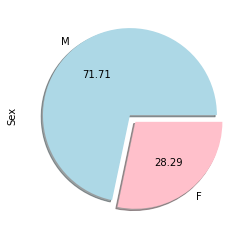

In [148]:
#we see the percentage of men and women who won the medal in Olympic
df_pie=df['Sex'].value_counts()
df_pie.plot.pie(explode=[0,0.1],autopct='%.2f', shadow =True , colors=('lightblue','pink'));

In [149]:
#men and women performance over the time for SUMMER olympic season
fig = px.line(total_athlete,x='Year',y=['Male','Female'])
fig.update_layout(title='<b>Performance of men and women in summer olympics over the years<b> ',plot_bgcolor = 'whitesmoke')
fig.show()

**PERFORMANCE AND PARTICIPATION OF COUNTRIES IN OLYMPICS**

In [150]:
#by bar chart we see the 40 team that have the highest number of medals in Olympic
medals_region=country_medals.head(20)
fig = px.bar(medals_region, x='region', y='Total', 
      labels={"region": "Name of the Countries",
              "Total": "Total number for medals in each Country"
              })
fig.update_layout(title='<b>Number of medals per Olympic Team \n(1896-2016)<b>',height=700)
fig.show()

In [174]:
#by bar chart we see the 20 team that have the highest number of medals in Olympic for a sport
fig = px.bar(country_m_s, x='region', y='Medals', color='Sport', labels={
        "region": "Name of the country",
        "Medals": "Total medals won in the sport",
        "Sport": "Sports played by the athletes"
          })
fig.update_layout(title='<b>Top-20 countries and their highest number of medals with respect to sports <b>',height=700)

In [152]:
#participation of nations in Olympic over the year
nations1_df=df[df['Season'] == 'Summer']
nations1= nations1_df.groupby('Year').count()['region'].reset_index()
nations1.rename(columns={"region":"Count"},inplace=True)

fig= px.line(nations1,x='Year',y='Count')
fig.update_layout(title="<b>Participation of different nations in the Summer Olympics over the Years</b>",plot_bgcolor = " whitesmoke")
fig.show()

In [153]:
nations2_df=df[df['Season'] == 'Winter']
nations2= nations2_df.groupby('Year').count()['region'].reset_index()
nations2.rename(columns={"region":"Count"},inplace=True)

fig= px.line(nations2,x='Year',y='Count')
fig.update_layout(title="<b>Participation of different nations in the Winter Olympics over the Years</b>",plot_bgcolor = " whitesmoke")
fig.show()

**which sports have the most number of medals in the olympics**

In [154]:
#Medals won in each sport in the Olympics
s= df_sport.head(35)
fig = px.bar(s, x='Sport', y='Count', 
      labels={"Sport": "Name of the Sports",
              "Count": "Total number of medals in each sport"
              })
fig.update_layout(title='<b>Number of medals for each sport in Olympics<b>',height=600)

In [155]:
#Top-10 Successfull athletes
fig = px.bar(t_10, x='Name', y='Medals', color='region', labels={
        "Name": "Name of the athlete",
        "Medals": "Total medals won by the athlete",
        "region": "Country of the athlete"
          })
fig.update_layout(title='<b>Top-10 Successfull athletes<b>',height=700)

In [156]:
#Top-15 athlete of USA
fig = px.bar(y, x='Name', y='Medals', color='Sport', labels={
            "Name": "Name of the athletes",
            "Medals": "Total medals won by the athletes",
            "Sport": "Sports played by the athletes"
            },)
fig.update_layout(title='<b>Top-15 athlete of USA<b>',height=700)

**HEIGHT ,WEIGHT AND AGE DISTRIBUTION**

In [157]:
#scatterplot for distribution of height weight age
fig = px.scatter(df, x="Height", y="Weight",color='Age',title="<b>Variation Of Height , Weight and Age </b>")
fig.update_layout(autosize=True)
fig.show()

In [158]:
#youngest athlete in the olympics
youngest_medal_winner = df.loc [df ['Age'].idxmin()]
youngest_medal_winner[['Name','Age','Team','Year','Sport','Event']]

Name                        Dimitrios Loundras
Age                                         10
Team             Ethnikos Gymnastikos Syllogos
Year                                      1896
Sport                               Gymnastics
Event    Gymnastics Men's Parallel Bars, Teams
Name: 142882, dtype: object

In [159]:
#oldest athlete in the olympics
oldest_medal_winner = df.loc [df ['Age'].idxmax()]
oldest_medal_winner[['Name','Age','Team','Year','Sport','Event']]

Name     John (Herbert Crawford-) Copley (Williamson-)
Age                                                 73
Team                                     Great Britain
Year                                              1948
Sport                                 Art Competitions
Event    Art Competitions Mixed Painting, Graphic Arts
Name: 44584, dtype: object

#Prediction

for prediction part I worked on the copy of df with null value in Medal column.
first of all I checked numerical and categorical datas and then I did encoding

**encoding :**

In [160]:
new_df.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [161]:
data=new_df.copy()
data.drop(['Name','Games','region'],axis=1,inplace=True)

In [162]:
print('\nCategorical Columns\n')
data.select_dtypes(include=['O']).nunique()


Categorical Columns



Sex          2
Team      1184
NOC        230
Season       2
City        42
Sport       66
Event      765
Medal        3
dtype: int64

In [163]:
#creating list of numerical columns
numerical_columns = [column for column in data.columns if ((data.dtypes[column] != 'object') & (column not in ['Medal','Year']))]

#creating list of categorical columns
categorical_columns = [column for column in data.columns if data.dtypes[column] == 'object']

print('Numerical columns : ',numerical_columns)
print('\n')
print('Categorical columns : ',categorical_columns)

Numerical columns :  ['Age', 'Height', 'Weight']


Categorical columns :  ['Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [164]:
#for medals consider all the gold,silver and bronze medals 1 and other null value 0
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [165]:
# Binary encoding function for categorical columns
def binary_encoder(data, columns, positive_values):
    df = data.copy()

    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [166]:
# using Binary encoding for columns with 2 categories
data = binary_encoder(data, columns=['Sex', 'Season'], positive_values=['M', 'Summer'])

In [167]:
# one hot encoder function for categorical columns
def onehot_encoder(data, columns):
    df = data.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column],drop_first=True)
        # concat, dummies , original dataframe
        df = pd.concat([df, dummies], axis=1)
        
        # dropping original columns for which encoding applied.
        df.drop(column, axis=1,inplace=True)
    return df

In [168]:
# applying onehot encoding on features with more than 2 categories
data = onehot_encoder(data,columns = ['Team', 'NOC', 'City', 'Sport', 'Event'])

**Split, Train and Test, Scaling**

In [169]:
# Split dataframe into variables, dependent(y) and indepedent(X)
X = data.drop('Medal',axis=1).copy()
y = data['Medal'].copy()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [170]:
# Scaling Numerical Features
s_scaler = StandardScaler()
X_train[numerical_columns] = s_scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = s_scaler.transform(X_test[numerical_columns])

**Model:Random Forest Classifier**

In [171]:
# Random Forest classifier
model= RandomForestClassifier()
model.fit(X_train,y_train)

# Predict
y_pred = model.predict(X_test)

print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96     45871
           1       0.89      0.59      0.71      8076

    accuracy                           0.93     53947
   macro avg       0.91      0.79      0.84     53947
weighted avg       0.93      0.93      0.92     53947



In [172]:
print("accuracy score:", accuracy_score(y_test, y_pred))

accuracy score: 0.9282258512984967


In [173]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[45307,   564],
       [ 3308,  4768]])